In [1]:
%%html
<style>
.color {
    color: #C0302B; 
}
</style>

<div class="color">
Created on : 7/14/2023
<hr>
This notebook is created with the intension of using as a reference code blocks for future use
In this notebook  I show different ways of creating synthetic datasets for classification. Datasets created here has 3 or 2 features anything more than that won't possible to visualize(we can use dimensionality reduction techniques like tsne or umap if feature is greater than 3).
<hr>
The codes and insights are taken from these resources-
 
* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html"> Sklearn Documentaion</a>
* <a href="https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922">Generating Synthetic Classification Data using Scikit</a>

* <a href="https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/">How to Generate Test Datasets in Python with scikit-learn</a>

</div>

# PACKAGES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import  make_blobs, make_moons, make_circles
from sklearn.datasets import make_classification, make_gaussian_quantiles, make_regression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def plot_2d(X:np.array, labels=None, **kwargs):

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, **kwargs)
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.title("Features in 2d space")
    
    
    
def plot_3d(X:np.array, labels=None, **kwargs):
    fig = plt.figure()
    ax  = plt.axes(projection='3d')

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)

    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.ylabel("Feature3")
    plt.title("Features in 3d space")

# SPECIFIC TYPE OF DATASETS

<p class='color'>
* n_samples: the number of datapoints<Br>
* n_features: the number of features in the dataset<Br>
* centers: the the number of cluster<Br>
* cluster_std: think of it as how spread out the clusters are<br>
* noise: add noise to the dataset<Br>
</p>

## Blobs classification problem

<p class='color'>The make_blobs() function can be used to generate blobs of points with a Gaussian distribution.You can control how many blobs to generate and the number of samples to generate, as well as a host of other properties.The problem is suitable for linear classification problems given the linearly separable nature of the blobs.</p>

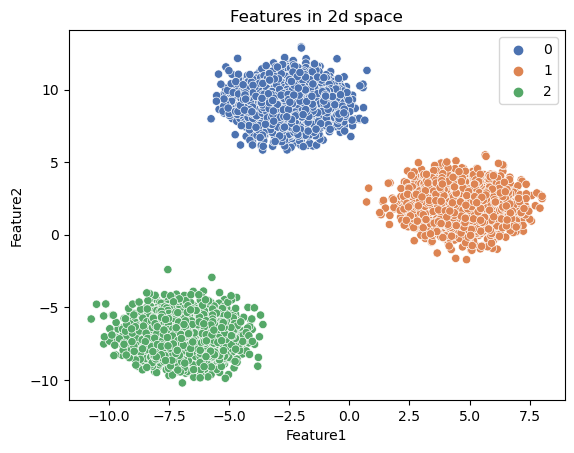

In [4]:
# create a dataset with 1000, 2 features and 3 clusters 
n_samples = 10000
n_features = 2
centers = 3;
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=42)
plot_2d(X, labels=y, palette='deep')

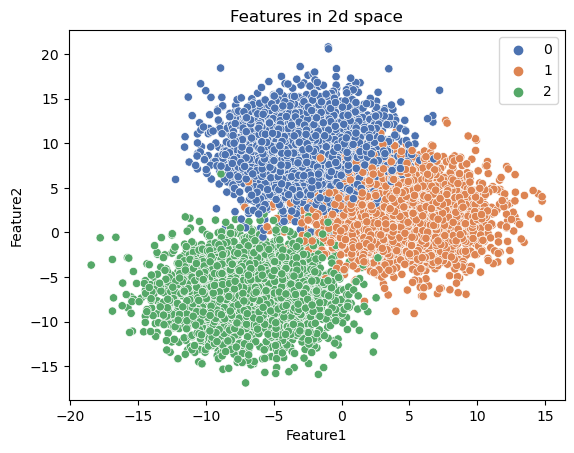

In [5]:
# create a dataset with 1000, 2 features and 3 clusters and some spread
centers = 3
cluster_std = 3

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, random_state=42)
plot_2d(X, labels=y, palette='deep')

## Moon Classification Problem
<p class='color'>Generate two swirl pattern and  suitable for algorithms that are capable of learning nonlinear class boundaries.
</p>


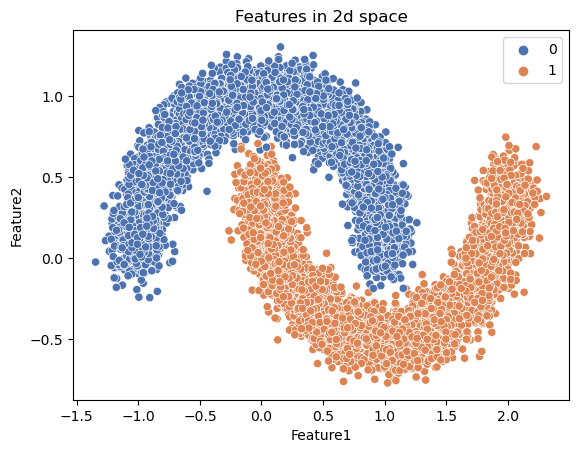

In [6]:
# only 2 swril pattern can be generated
X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=42)
plot_2d(X, labels=y, palette='deep')

# Circles Classification Problem

<p class='color'>This test problem is suitable for algorithms that can learn complex non-linear manifolds.</p>

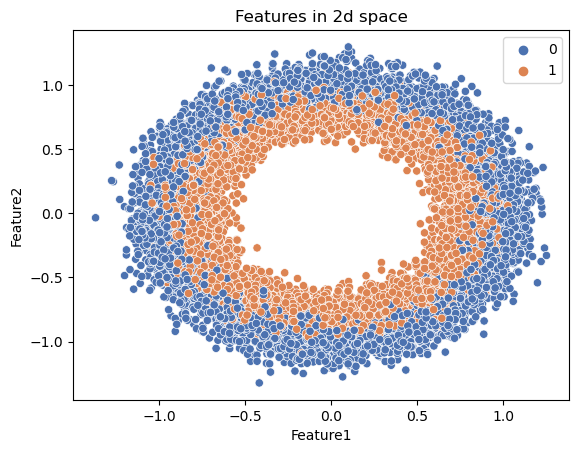

In [7]:
X, y = make_circles(n_samples=n_samples, noise=0.1, random_state=42)
plot_2d(X, labels=y, palette='deep')

# FLEXIBILE DATASET CREATION

## make_gaussian_quantiles
<p class='color'>The data are drawn from normal distribution and lets you control the mean of each feature. Controls more control over class characteristic

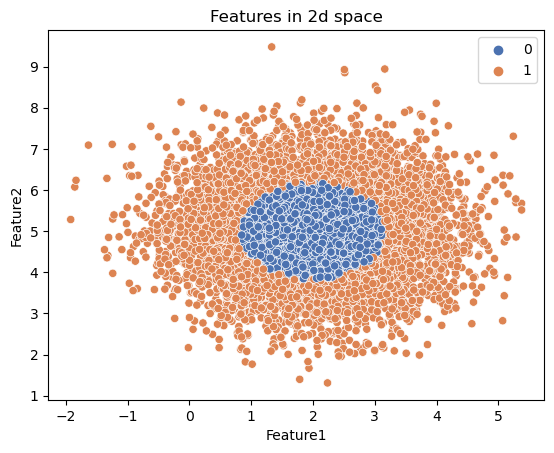

In [8]:
n_samples = 10000
n_features = 2
n_classes = 2
mean = (2, 5) #mean of feature1 is 2 and mean of feature2 is 5 for both class label
X, y = make_gaussian_quantiles(mean=mean, n_samples=n_samples, n_features=n_features, n_classes=2, random_state=42)

plot_2d(X, y, palette='deep')

In [9]:
temp_df = pd.DataFrame(X, columns=['feature1', 'feature2'])
temp_df['label'] = y

temp_df.groupby('label').mean()

,feature1,feature2
label,,
0,1.996022,5.003363
1,2.011166,5.012245


Text(0.5, 1.0, 'distribution of feature')

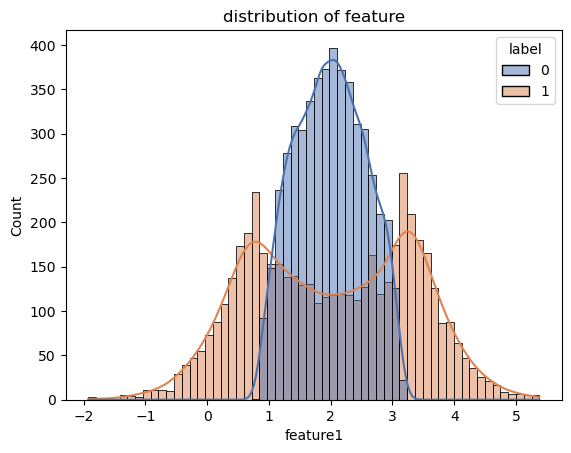

In [10]:
sns.histplot(data=temp_df, x='feature1', hue='label', palette='deep', kde=True)
plt.title("distribution of feature")

Text(0.5, 1.0, 'distribution of feature')

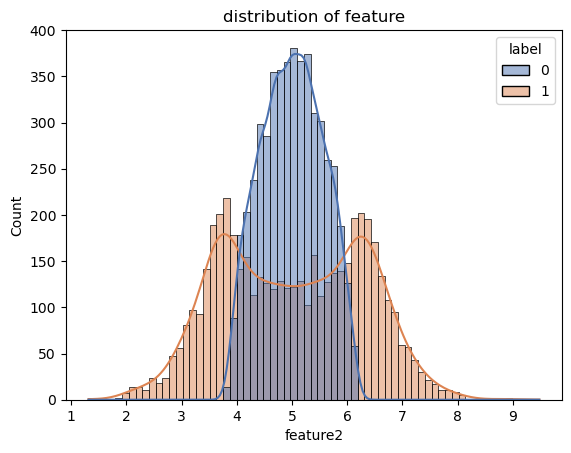

In [11]:
sns.histplot(data=temp_df, x='feature2', hue='label', palette='deep', kde=True)
plt.title("distribution of feature")

<p class='color'>For both class 1 and class 0 the mean of feature1 is 2 and mean of feature2 is 5 but the distribution is different for each class label</p>

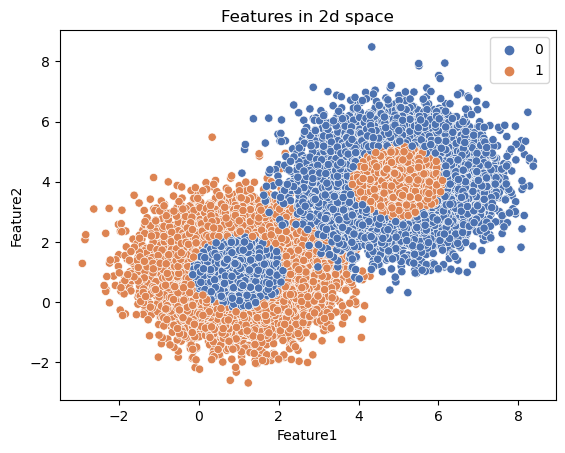

In [12]:
# creating more complicated datasets by adding two datasets with different distribution and mean
X1, y1 = make_gaussian_quantiles(mean=(1, 1), n_samples=n_samples, n_features=n_features, n_classes=2, random_state=42)

X2, y2 = make_gaussian_quantiles(mean=(5, 4), n_samples=n_samples, n_features=n_features, n_classes=2, random_state=42)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2+1))

plot_2d(X, labels=y, palette='deep')

## Make Classification
<div class='color'>
<p>most flexible function for creating classficiation dataset with more freedom in features distribution and classes</p>

<p>
* n_informative: the number of features which is informative<br>
* n_redundant: the number of features which can derived from another features/high correlation with other features<br>
* n_clusters_per_class: the number of clusters per class<br>
* class_sep: float value which tells how seperable the clusters/classes are<br>
* flip_y: add noise in the dataset<br>
* weight: assings class weights decided the numbero data points belonging to each class<br>
* shift: add a constant value to each feature<br>
* hypecube: makes data points in clusters more random(not sure)<br>
       
<b>n_informative + n_redundant + n_repeated <= n_features</b> &
<b>n_classes * n_clusters_per_class <= 2**n_informative</b>
</p>                                                  

</div>

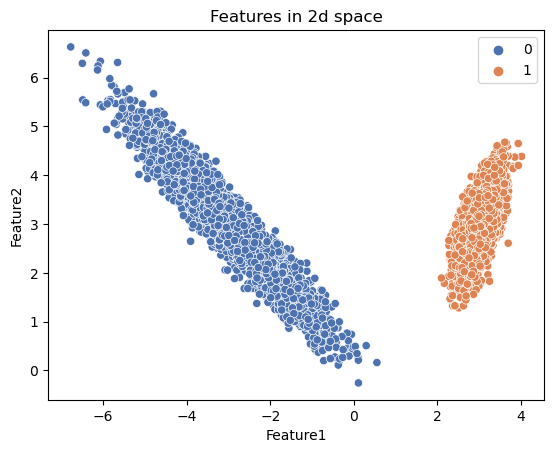

In [13]:
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                          n_classes=2, n_clusters_per_class=1,
                          class_sep=3,  flip_y=0, weights=[0.5,0.5], random_state=42)


plot_2d(X, y, palette='deep')

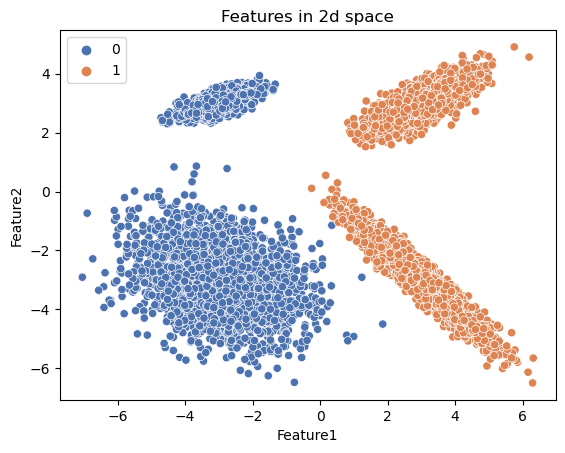

In [14]:
# increasing number clusters
n_clusters_per_class = 2
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                          n_classes=2, n_clusters_per_class=n_clusters_per_class,
                          class_sep=3,  flip_y=0, weights=[0.5,0.5],random_state=42)

plot_2d(X, y, palette='deep')

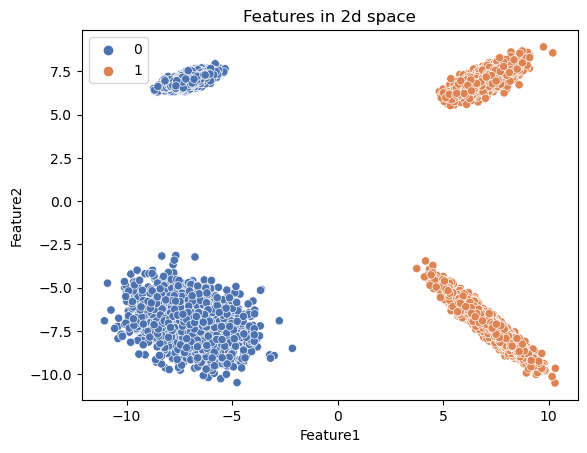

In [15]:
# greater value of class sep control the spearation between each class
class_sep = 7
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                          n_classes=2, n_clusters_per_class=2,
                          class_sep=class_sep,  flip_y=0, weights=[0.5,0.5], random_state=42)


plot_2d(X, y, palette='deep')

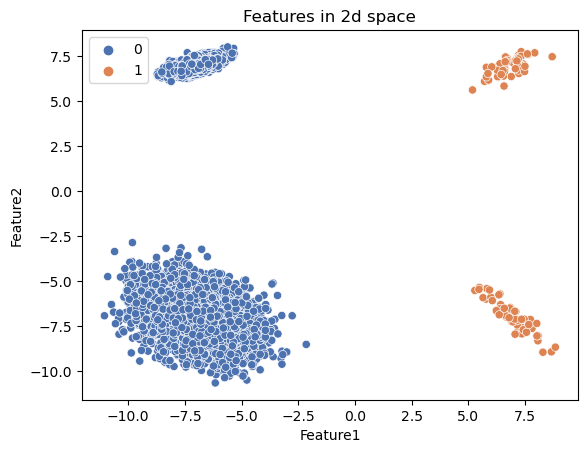

In [16]:
# adding imbalance
weights = [0.99, 0.01]
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                          n_classes=2, n_clusters_per_class=2,
                          class_sep=7,  flip_y=0, weights=weights, random_state=42)


plot_2d(X, y, palette='deep')

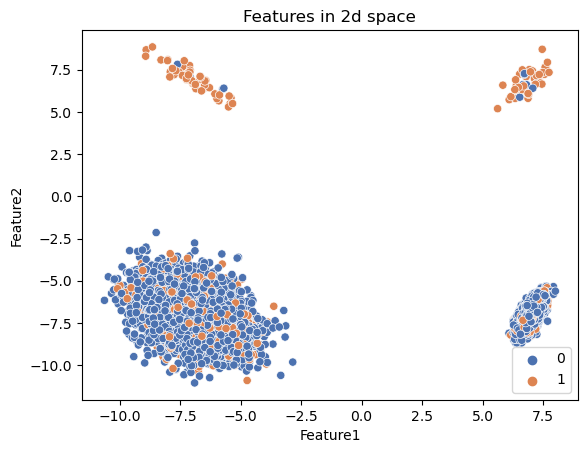

In [17]:
# adding noise
flip_y = 0.3
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                          n_classes=2, n_clusters_per_class=2,
                          class_sep=7,  flip_y=flip_y, weights=[0.99,0.01], random_state=42)


plot_2d(X, y, palette='deep')

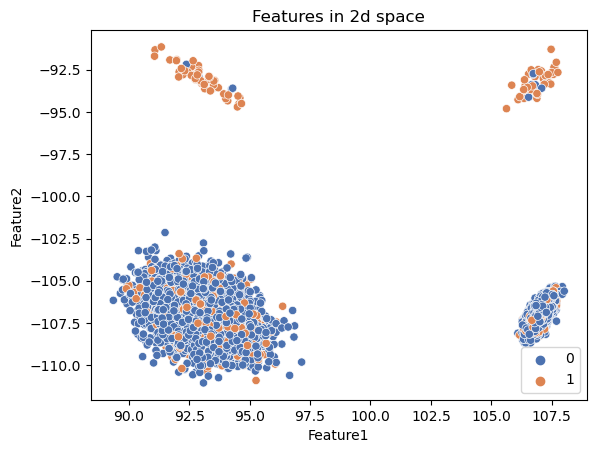

In [18]:
# shifting features by some value
shift = [100, -100]
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
                          n_classes=2, n_clusters_per_class=2,
                          class_sep=7,  flip_y=0.3, weights=[0.99,0.01], random_state=42, shift=shift)


plot_2d(X, y, palette='deep')

### 3d plot

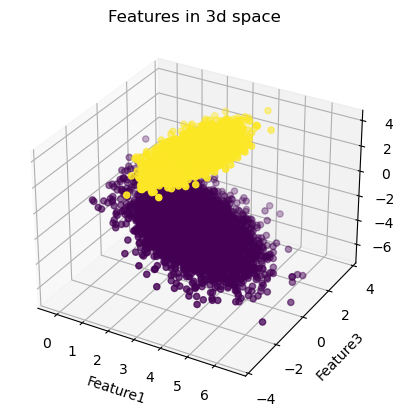

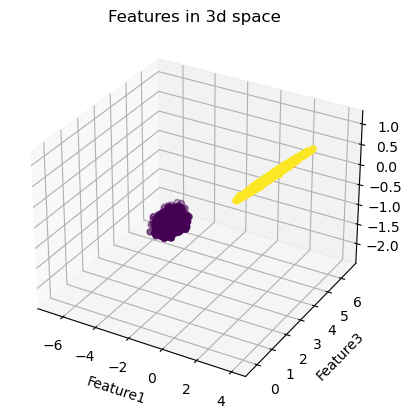

In [19]:
redundant = 0
X0,y0 = make_classification(n_samples=10000, n_features=3, n_informative=2, n_redundant=redundant, n_repeated=0,
                          n_classes=2, n_clusters_per_class=1,
                          class_sep=3,  flip_y=0, weights=[0.5,0.5], random_state=42)


redundant = 1
X1, y1 = make_classification(n_samples=10000, n_features=3, n_informative=2, n_redundant=redundant, n_repeated=0,
                          n_classes=2, n_clusters_per_class=1,
                          class_sep=3,  flip_y=0, weights=[0.5,0.5], random_state=42)



plot_3d(X0, y0)

# with redundant 3rd feature
plot_3d(X1, y1)

<p class="color">Notice that in redundant plot the data points seem to be concentrated on certain part of 3d plot which is signifying redundant feature
          lets explore more with interactive visualization</p>

In [20]:
# without  redundant 3rd feature
temp_df = pd.DataFrame(X0, columns=['feature1', 'feature2', 'feature3'])
temp_df['label'] = y0

temp_df.corr()

,feature1,feature2,feature3,label
feature1,1.000000,-0.008946,-0.186832,-0.007543
feature2,-0.008946,1.000000,0.008587,0.005436
feature3,-0.186832,0.008587,1.000000,0.970744
label,-0.007543,0.005436,0.970744,1.000000


In [21]:
temp_df['label'] = temp_df['label'].astype(str)
fig = px.scatter_3d(temp_df, x='feature1', y='feature2', z='feature3', color='label', width=800, height=500)
fig.show()

In [22]:
temp_df = pd.DataFrame(X1, columns=['feature1', 'feature2', 'feature3'])
temp_df['label'] = y1.astype(str)

temp_df.corr()

/tmp/ipykernel_20/208212609.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,feature1,feature2,feature3
feature1,1.000000,-0.186832,0.999659
feature2,-0.186832,1.000000,-0.212417
feature3,0.999659,-0.212417,1.000000


In [23]:
temp_df['label'] = temp_df['label'].astype(str)
fig = px.scatter_3d(temp_df, x='feature1', y='feature2', z='feature3', color='label', width=800, height=500)
fig.show()